<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=420/></p>

<h3 style="text-align: center;"><b>Phystech School of Applied Mathematics and Informatics (PSAMI) MIPT</b></h3>

---

<h2 style="text-align: center;"><b>Multilayer Perceptron on PyTorch</b></h3>

---

Hello! In this notebook we will learn how to train a multilayer fully-connected neural network using PyTorch.

<h3 style="text-align: center;"><b>Multilayer Neural Network</b></h3>

Multilayer Neural Networks consist of **layers**, each layer consists of **neurons**. If these neurons are just like the one we were discussing last lesson then this network is called **Multi-Layer Perceptron (MLP)**.  

If all the neurons of the previous layer connected to all the neurons of the next layer in this network then it is called the **Fully-Connected Network** (and its layers sometimes called the **Dense layers**).  

In our course "MLP", "FC" and "Multilayer Neural Network" are the synonyms.

The structure of the multilayer fully-connected NN is described below:

* Two layer network (**note:** we will count the layers using the **connections** betweeen neurons, not the neurons themself):

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" width=300, height=200>

* Three layer network:

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=400, height=200>

.. and so it is for larger number of layers.

**Note:** there are connections between the neurons of the layer number $L_{i-1}$ and the layer number $L_{i}$, but there are no connections between the neurons inside one layer.

There are three types of layers in the neural network: Input, Hidden and Output layer.

**Input layer** is just the input feature matrix itself. If there are N objects and M features for each object ($(N, M)$ matrix), then the Input layer has $M$ neurons.

Layers which are not the Input layer and not the Output layer are called the **Hidden layers**.

The structure of the **Output layer** varies:
* In case of the *regression task* the Output layer has one neuron that predicts the target value  
* In case of the *classification task* the Ouput layer has $K$ neurons, where $K$ is the number of classes

#### MLP: Forward pass

Each layer of the neural network has its own **weight matrix**, the columns of this matrix are the weights of the neurons (**one column = one neuron**).

Consider the $K$ class classification task (the Output layer has $K$ neurons). Let's understand what will be the `forward_pass` of this network:

* Feature matrix $(N, M)$: $$X =
\left(
\begin{matrix} 
x_{11} & ... & x_{1M} \\
... & \ddots  & ...\\
x_{N1} & ... & x_{NM} 
\end{matrix}
\right)
$$

* The first hidden layer with the shape $(M, L_1)$:

$$ W^1 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_1} \\
... & \ddots  & ...\\
w_{M1} & ... & w_{ML_1} 
\end{matrix}
\right)
$$

I.e. $L_1$ neurons with its own $M$ weigths each.

Keep in mind that each hidden leayer has ts own **weight matrix** and its own **activation function**. In DL frameworks `Linear` usually stands for the weight matrix and `Activation` stands for the activation function of this layer. The activation function is usually applied **elementwise** right after the weight matrix.

* The others hidden layer's structure is just the same as for the first layer, e.f. the second layer with the weight matrix shape $(L_1, L_2)$:

$$ W^2 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_2} \\
... & \ddots  & ...\\
w_{L_11} & ... & w_{L_1L_2} 
\end{matrix}
\right)
$$

$L_2$ neuron, each has $L_1$ weights.

* The output layer:  

If there are $r$ hidden layers, then the output layer has the weight matrix of shape $(L_t, K)$:

$$ W^{out} =
\left(
\begin{matrix} 
w_{11} & ... & w_{1K} \\
... & \ddots  & ...\\
w_{L_t1} & ... & w_{L_tK} 
\end{matrix}
\right)
$$

($K$ is the number of classes)

Thus *for the `forward pass` we need just to multiply matrices of the layers applying the activation function after each multiplication*.

**Note**: one can think of this matrix multiplication as of transition into the **new feature space**. In fact, when we feed the input feature matrix $(N, M)$ into the first hidden layer we get $(N, L_1)$ matrix, so this layer as if generates $L_1$ "new" features (each neuron extracts its own, new feature). Here it is appropriately to remember that in Deep Learning we enforce neural networks to learn the effective representations of the objects, i.e. to learn the effective feature space, which is possible due to non-linearities between layers.

**MLP: Backward pass**

Multilayer nets trains with [Error Backpropagation](https://en.wikipedia.org/wiki/Backpropagation) algorithm. The goal of any supervised learning algorithm is to find a function that best maps a set of inputs to their correct output. The motivation for backpropagation is to train a multi-layered neural network such that it can learn the appropriate internal representations to allow it to learn any arbitrary mapping of input to output.

Backpropagation works becuse of **chain rule**:  if $f(x) = f(g(x))$ then  

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{g}} \frac{\partial{g}}{\partial{x}}$$

Step-by-step backpropagation explanation:  https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/  
Very nice explanation on Wikipedia: https://en.wikipedia.org/wiki/Backpropagation

<h3 style="text-align: center;"><b>Neural Network training</b></h3>

Let's briefly recap the things to keep in mind when you are writing the code for neural network training:

- the neural network **architecture** (activation functions)
- the **loss function** (`loss`)
- the **optimization method** (and `learning_rate` policy)
- the **batch size** (`batch_size`);
- the number of training **epochs** (`num_epochs`);
- the **initialization** of the weight matrices of NN layers
- the **regularization** of the neural network (`weight_decay`)

Let's creatae the two-layer neural network with 100 neurons:

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import torch

Dataset generation:

In [0]:
# code credit: http://cs231n.github.io/neural-networks-case-study/
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

In [0]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [0]:
print(X.data.shape, y.data.shape)

torch.Size([300, 2]) torch.Size([300])


Code for setting up the network's achitecture and its training:

In [0]:
# N = batch_size
# D_in = input dimensionality (num_features)
# H = number of neurons in the hidden layer
# D_out = output dimensionality (num_classes)
N, D_in, H, D_out = 64, 2, 100, 3

# using the nn package to define our model and loss function
two_layer_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(two_layer_net.parameters(), lr=learning_rate)
for t in range(500):
    # forward pass
    y_pred = two_layer_net(X)

    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # updating the nn parameters
    optimizer.step()

c:\users\izakharkin\anaconda3\envs\vision\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 342.2881164550781
1 339.5907897949219
2 337.05279541015625
3 334.6502685546875
4 332.36370849609375
5 330.1776123046875
6 328.07952880859375
7 326.0592956542969
8 324.10833740234375
9 322.22052001953125
10 320.3893737792969
11 318.6105651855469
12 316.88043212890625
13 315.1954650878906
14 313.55291748046875
15 311.9503479003906
16 310.3856201171875
17 308.8574523925781
18 307.3634948730469
19 305.90277099609375
20 304.47412109375
21 303.0757141113281
22 301.7073974609375
23 300.3672790527344
24 299.0553894042969
25 297.7703552246094
26 296.5113525390625
27 295.2778015136719
28 294.0689392089844
29 292.8838195800781
30 291.7221374511719
31 290.5832214355469
32 289.4666442871094
33 288.3717041015625
34 287.2977294921875
35 286.2444763183594
36 285.2110900878906
37 284.197265625
38 283.20257568359375
39 282.2266540527344
40 281.2687072753906
41 280.32855224609375
42 279.4057922363281
43 278.5000305175781
44 277.6103210449219
45 276.7372741699219
46 275.8798522949219
47 275.037841796875

401 210.3812255859375
402 210.33612060546875
403 210.29092407226562
404 210.24591064453125
405 210.201171875
406 210.1563262939453
407 210.11151123046875
408 210.06704711914062
409 210.02249145507812
410 209.97824096679688
411 209.93399047851562
412 209.88963317871094
413 209.84576416015625
414 209.80162048339844
415 209.75767517089844
416 209.71388244628906
417 209.6701202392578
418 209.62640380859375
419 209.58282470703125
420 209.5392608642578
421 209.49581909179688
422 209.4524688720703
423 209.4090576171875
424 209.3658905029297
425 209.32281494140625
426 209.2797393798828
427 209.23680114746094
428 209.1937713623047
429 209.15106201171875
430 209.10830688476562
431 209.0656280517578
432 209.02316284179688
433 208.98046875
434 208.93804931640625
435 208.8955841064453
436 208.8531951904297
437 208.81092834472656
438 208.7686004638672
439 208.72630310058594
440 208.68418884277344
441 208.64210510253906
442 208.60012817382812
443 208.55796813964844
444 208.5161590576172
445 208.47428

**Note:** recall that the $y$ column should be One-Hot-Encoded for backprop to work, but you can see that all the training process passed correctly, despite we haven't encoded the labels (check it). The point is, PyTorch deals with it on its own.

Let's test this 100-neurons network:

In [0]:
# back to numpy arrays for plotting
X = X.data.numpy()
y = y.data.numpy()

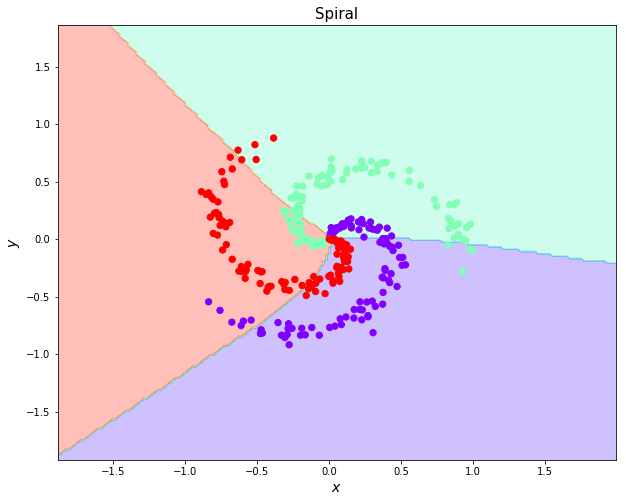

In [0]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = two_layer_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Spiral', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Poorly. Let's tune the hyperparameters:

In [0]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [0]:
N, D_in, H, D_out = 64, 2, 100, 3

better_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-3
optimizer = torch.optim.SGD(better_net.parameters(), lr=learning_rate)
for t in range(1000):
    y_pred = better_net(X)

    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

c:\users\izakharkin\anaconda3\envs\vision\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 328.8710021972656
1 326.9362487792969
2 325.1546325683594
3 323.42340087890625
4 321.70428466796875
5 319.91937255859375
6 317.97271728515625
7 315.86627197265625
8 313.6033020019531
9 311.13818359375
10 308.42535400390625
11 305.4170837402344
12 302.0528564453125
13 298.3348083496094
14 294.25311279296875
15 289.8611145019531
16 285.1593322753906
17 280.19012451171875
18 275.0135192871094
19 269.7210998535156
20 264.40594482421875
21 259.1275329589844
22 253.96693420410156
23 248.97959899902344
24 244.1910858154297
25 239.62698364257812
26 235.2977294921875
27 231.2171173095703
28 227.37969970703125
29 223.80941772460938
30 220.48602294921875
31 217.39398193359375
32 214.51536560058594
33 211.84197998046875
34 209.3766632080078
35 207.08441162109375
36 204.95468139648438
37 202.99142456054688
38 201.21522521972656
39 199.7644500732422
40 199.21945190429688
41 201.95379638671875
42 217.40359497070312
43 266.6657409667969
44 337.32806396484375
45 234.6692657470703
46 210.3161926269531

408 15.268081665039062
409 14.306334495544434
410 15.20758056640625
411 14.234708786010742
412 15.14058780670166
413 14.164193153381348
414 15.06890869140625
415 14.08972454071045
416 14.985175132751465
417 14.024297714233398
418 14.913249969482422
419 13.9625883102417
420 14.833564758300781
421 13.907134056091309
422 14.74816608428955
423 13.8523588180542
424 14.6647367477417
425 13.808051109313965
426 14.578987121582031
427 13.761372566223145
428 14.495248794555664
429 13.719423294067383
430 14.39525318145752
431 13.675196647644043
432 14.295626640319824
433 13.628669738769531
434 14.18637752532959
435 13.589740753173828
436 14.07384967803955
437 13.545759201049805
438 13.961043357849121
439 13.503717422485352
440 13.838449478149414
441 13.46435546875
442 13.71532917022705
443 13.451363563537598
444 13.61624526977539
445 13.467629432678223
446 13.525742530822754
447 13.522668838500977
448 13.458089828491211
449 13.618330955505371
450 13.411986351013184
451 13.756853103637695
452 13.3

804 9.248781204223633
805 9.834028244018555
806 9.196965217590332
807 9.81722640991211
808 9.139776229858398
809 9.803309440612793
810 9.087185859680176
811 9.769956588745117
812 9.043188095092773
813 9.76273250579834
814 9.002216339111328
815 9.749370574951172
816 8.959317207336426
817 9.729765892028809
818 8.920424461364746
819 9.711052894592285
820 8.885725021362305
821 9.682641983032227
822 8.841510772705078
823 9.636178970336914
824 8.817317962646484
825 9.607590675354004
826 8.794772148132324
827 9.57313060760498
828 8.779581069946289
829 9.522409439086914
830 8.76443862915039
831 9.470333099365234
832 8.740239143371582
833 9.401089668273926
834 8.744280815124512
835 9.346678733825684
836 8.740494728088379
837 9.277177810668945
838 8.765356063842773
839 9.219695091247559
840 8.817328453063965
841 9.158203125
842 8.897964477539062
843 9.096548080444336
844 9.011956214904785
845 9.034590721130371
846 9.168107032775879
847 9.001518249511719
848 9.400300025939941
849 8.99849319458007

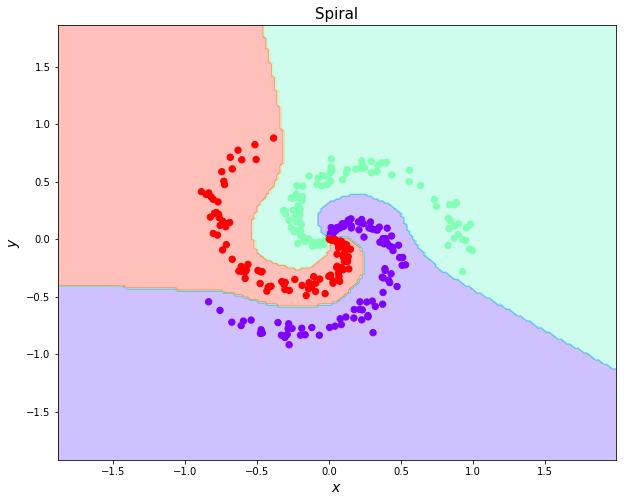

In [0]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = better_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Spiral', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

**Important:** What changes were made to improve the quality? Remember them.

---

<h3 style="text-align: center;"><b>Further reading</b></h3>

1). *Neural Networks on PyTorch examples (official tutorials):  
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). *cs231n course:  http://cs231n.github.io/*  

3). *cs231n lecture notes*:  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Good article about the basics of neural networks:  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Convnet.js library for NN visualization:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Good explanation of Backpropagation algorithm: https://en.wikipedia.org/wiki/Backpropagation*

7). *Popular explanation of Backpropagation: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

8). *The article about Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*